In [1]:
#installing necessary libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
#!pip install -q yellowbrick

In [193]:
#importing necessary libraries
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # For initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.model_selection import RandomizedSearchCV              # To find best hyperparamter setting for the algorithm
from sklearn.ensemble import RandomForestClassifier                 # To implement random forest classifier
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

In [256]:
# Load the data
custTrain = pd.read_csv(filepath_or_buffer='./custTrain.csv')
custTest = pd.read_csv(filepath_or_buffer='./custTest.csv')

# Get the dimensions of data
print('Shape of the train dataset:',custTrain.shape)
print('Shape of the test dataset:',custTest.shape)

Shape of the train dataset: (8124, 32)
Shape of the test dataset: (2031, 31)


In [3]:
custTrain.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


In [51]:
custTest.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98,55.47,24.99,29.98,49.98,44.47,0.00,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00,0.00,0.00,99.91,35.42,29.49,170.31,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00,154.47,0.00,67.47,0.00,87.83,0.00,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98,60.98,0.00,17.99,9.99,0.00,102.43,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00,144.90,0.00,123.38,0.00,32.98,0.00,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99


In [29]:
custTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

In [53]:
custTest.shape

(2031, 31)

In [10]:
custTrain.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


In [169]:
custTrain.columns

Index(['REF_NO', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid',
       'newFamilyIncome', 'newHomeStatus'],
      dtype='object')

<AxesSubplot:xlabel='region'>

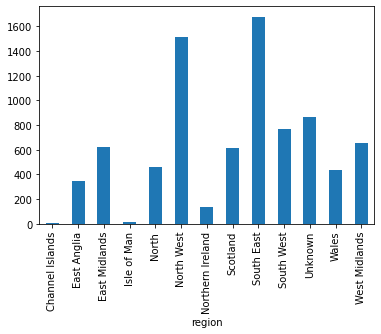

In [19]:
#number of customers in each region
custTrain['REF_NO'].groupby(custTrain['region']).count().plot(kind='bar')

<AxesSubplot:xlabel='occupation'>

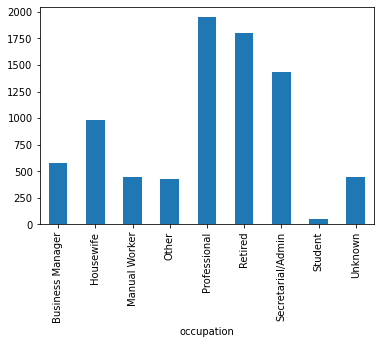

In [23]:
#number of customers based on their status
custTrain['REF_NO'].groupby(custTrain['occupation']).count().plot(kind='bar')

In [25]:
custTrain['Average_Credit_Card_Transaction'].describe()

count    8124.000000
mean       23.251094
std        51.147496
min         0.000000
25%         0.000000
50%         0.000000
75%        23.480000
max       662.260000
Name: Average_Credit_Card_Transaction, dtype: float64

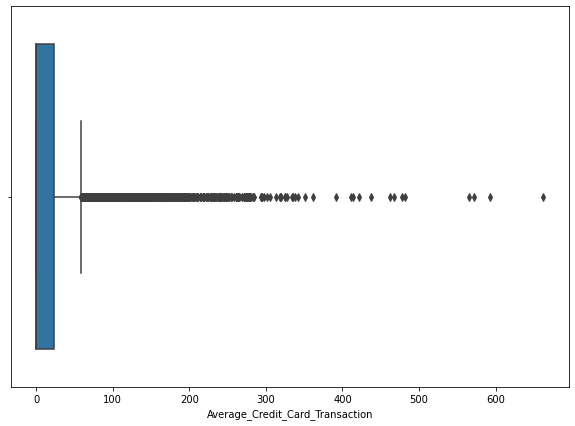

In [138]:
#using boxplot to visualize the outliers in the column

plt.figure(figsize=(10,7))
# Adding percentages to the bars.
sns.boxplot(x=custTrain['Average_Credit_Card_Transaction'])
plt.show()

<AxesSubplot:xlabel='age_band'>

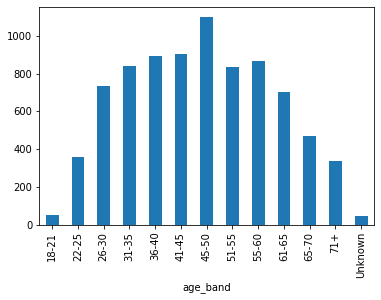

In [26]:
#number of customers based on their age group
custTrain['REF_NO'].groupby(custTrain['age_band']).count().plot(kind='bar')

In [187]:
custTrain.isna().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
gender                             0
region                             0
I

In [ ]:
#to map categorical values with corresponding numerical values.
#custTrain['newHomeStatus'] = custTrain.home_status.map({'Own Home':0, 'Rent from Council/HA':1,'Rent Privately':2,'Live in Parental Hom':3,'Unclassified':5})

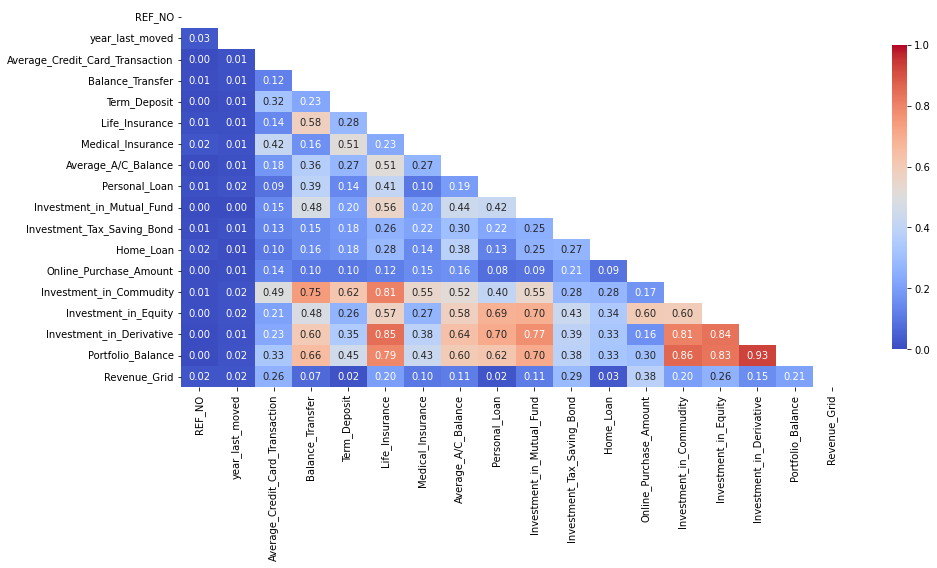

In [261]:
corr = custTrain.corr().abs()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(15,7))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
#plt.yticks(rotation=0)
plt.show()

In [257]:

# Instantiating input and output data by dropping unnecessary data features
# X = custTrain.drop(labels=['children','age_band','status','occupation','occupation_partner','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region','home_status','family_income'], axis=1)

# y = custTrain.Revenue_Grid

# #X_test = custTest.drop(labels=['children','age_band','status','occupation','occupation_partner','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region','home_status','family_income'], axis=1)

# X_train,X_test, y_train , y_test = train_test_split(X, y,test_size=0.2, random_state=123)

X_train = custTrain.drop(labels=['children','age_band','status','occupation','occupation_partner','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region','home_status','family_income','Revenue_Grid'],axis=1)

y_train = custTrain['Revenue_Grid']

X_test = custTest.drop(labels=['children','age_band','status','occupation','occupation_partner','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region','home_status','family_income'],axis=1)


In [266]:
print('X_train shape = ',X_train.shape)
print('X_test shape = ',X_test.shape)
print('y_train shape = ',y_train.shape)
#print(y_test.shape)

X_train shape =  (8124, 16)
X_test shape =  (2031, 16)
y_train shape =  (8124,)


In [259]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [260]:
y_test_pred = rfc.predict(X_test)

In [255]:
output = pd.DataFrame({'REF Number': custTest.REF_NO, 'Revenue Grid': y_test_pred})
output.to_csv('submission.csv', index=False, header=False)